In [1]:
import json
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = ['business.json','checkin.json','review.json','tip.json','user.json']
                

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
# with open(file_checkin) as f:
#     df_checkin = pd.DataFrame(json.loads(line) for line in f)

In [5]:
with open(file_review,encoding="utf8") as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)

In [6]:
with open(file_tip,encoding="utf8") as f:
    df_tip = pd.DataFrame(json.loads(line) for line in f)

In [7]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)

In [8]:
# keep business entities of only US in the dataframe.
state = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
        'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VT','VA',
         'WA','WV','WI','WY']

df_business = df_business[df_business['postal_code'].str.len() == 5]

df_business = df_business[df_business['state'].str.contains('AL|AK|AZ|AR|CA|CO|CT|DE|DC|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|\
NY|NC|ND|OH|OK|OR|PA|PR|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY')]

In [9]:
df_business = df_business.rename(columns={'stars':'avg_stars'})

In [10]:
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,avg_stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


=============================================================================================

In [11]:
df_bus_rev = df_business.merge(df_review[['business_id','stars','date','useful','funny','cool']], how='left', on='business_id')

In [12]:
df_bus_rev['date'] = pd.to_datetime(df_bus_rev.date)
filter_date = (df_bus_rev.date >= '2016-01-01') & (df_bus_rev.date < '2017-01-01')
df_bus_rev_2016 = df_bus_rev[filter_date]

In [13]:
filter_date = (df_bus_rev.date >= '2015-01-01') & (df_bus_rev.date < '2016-01-01')
df_bus_rev_2015 = df_bus_rev[filter_date]

In [14]:
filter_date = (df_bus_rev.date >= '2014-01-01') & (df_bus_rev.date < '2015-01-01')
df_bus_rev_2014 = df_bus_rev[filter_date]

In [15]:
filter_date = (df_bus_rev.date >= '2013-01-01') & (df_bus_rev.date < '2014-01-01')
df_bus_rev_2013 = df_bus_rev[filter_date]

In [16]:
filter_date = (df_bus_rev.date >= '2012-01-01') & (df_bus_rev.date < '2013-01-01')
df_bus_rev_2012 = df_bus_rev[filter_date]

In [17]:
filter_date = (df_bus_rev.date >= '2011-01-01') & (df_bus_rev.date < '2012-01-01')
df_bus_rev_2011 = df_bus_rev[filter_date]

In [18]:
filter_date = (df_bus_rev.date >= '2010-01-01') & (df_bus_rev.date < '2011-01-01')
df_bus_rev_2010 = df_bus_rev[filter_date]

In [19]:
filter_date = (df_bus_rev.date >= '2009-01-01') & (df_bus_rev.date < '2010-01-01')
df_bus_rev_2009 = df_bus_rev[filter_date]

In [20]:
filter_date = (df_bus_rev.date >= '2008-01-01') & (df_bus_rev.date < '2009-01-01')
df_bus_rev_2008 = df_bus_rev[filter_date]

In [21]:
df_bus_rev_2016

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,avg_stars,state,stars,date,useful,funny,cool
3,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,4,2016-05-07,0,0,0
5,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,1,2016-02-09,0,0,0
15,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,5,2016-06-20,0,0,0
19,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,5,2016-02-18,0,0,0
23,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA,1,2016-07-25,6,4,0
27,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA,1,2016-02-17,5,2,0
32,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA,5,2016-03-02,1,0,0
35,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ,4,2016-11-03,1,0,0
44,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ,2,2016-06-23,0,0,0
45,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ,1,2016-08-26,1,0,0


In [22]:
df_rev_com_2016 = df_bus_rev_2016[['postal_code','useful','funny','cool']].groupby('postal_code').sum()
df_rev_com_2016 = df_rev_com_2016.reset_index()

In [23]:
df_stars_2016 = df_bus_rev_2016[['postal_code','stars']].groupby('postal_code').mean()
df_stars_2016 = df_stars_2016.reset_index()

In [24]:
df_rev_cnt_2016 = df_bus_rev_2016[['postal_code','review_count']].groupby('postal_code').count()
df_rev_cnt_2016 = df_rev_cnt_2016.reset_index()

In [25]:
df_feat_2016 = reduce(lambda left,right: pd.merge(left,right,on='postal_code'), [df_rev_com_2016,df_stars_2016,df_rev_cnt_2016])

In [26]:
df_feat_2016['stars_adj'] = df_feat_2016['stars'] * df_feat_2016['review_count']/df_bus_rev_2016.shape[0] * 100

In [27]:
df_feat_2016

,postal_code,useful,funny,cool,stars,review_count,stars_adj
0,02224,0,0,0,2.000000,2,0.000454
1,05440,0,0,0,3.666667,3,0.001248
2,05452,5,3,3,4.272727,11,0.005331
3,12919,37,1,0,2.642857,14,0.004197
4,12923,0,0,0,5.000000,2,0.001134
5,12958,1,0,0,5.000000,1,0.000567
6,12979,2,0,3,4.250000,8,0.003856
7,15003,55,13,20,4.215190,79,0.037770
8,15009,0,0,0,1.000000,1,0.000113
9,15015,2,3,0,3.000000,2,0.000681


In [28]:
df_tip

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ
4,ESzO3Av0b1_TzKOiqzbQYQ,2017-01-28,0,"Parking is a premium, keep circling, you will ...",ulQ8Nyj7jCUR8M83SUMoRQ
5,k7WRPbDd7rztjHcGGkEjlw,2017-02-25,0,Homemade pasta is the best in the area,ulQ8Nyj7jCUR8M83SUMoRQ
6,k7WRPbDd7rztjHcGGkEjlw,2017-04-08,0,"Excellent service, staff is dressed profession...",ulQ8Nyj7jCUR8M83SUMoRQ
7,SqW3igh1_Png336VIb5DUA,2016-07-03,0,Come early on Sunday's to avoid the rush,ulQ8Nyj7jCUR8M83SUMoRQ
8,KNpcPGqDORDdvtekXd348w,2016-01-07,0,Love their soup!,ulQ8Nyj7jCUR8M83SUMoRQ
9,KNpcPGqDORDdvtekXd348w,2016-05-22,0,Soups are fantastic!,ulQ8Nyj7jCUR8M83SUMoRQ


In [29]:
df_bus_tip = df_business.merge(df_tip[['business_id','date','likes']], how='left', on='business_id')

In [30]:
df_bus_tip

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,avg_stars,state,date,likes
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,2012-12-04,0.0
1,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,2014-11-19,0.0
2,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,2016-02-23,0.0
3,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,2016-08-15,0.0
4,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,2017-06-23,0.0
5,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA,2011-01-04,0.0
6,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ,NaN,NaN
7,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ,2013-03-19,0.0
8,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ,2015-08-08,0.0
9,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ,2016-07-03,0.0


In [31]:
df_bus_tip['date'] = pd.to_datetime(df_bus_tip.date)

filter_date = (df_bus_tip.date >= '2016-01-01') & (df_bus_tip.date < '2017-01-01')
df_bus_tip_2016 = df_bus_tip[filter_date]

In [32]:
filter_date = (df_bus_tip.date >= '2015-01-01') & (df_bus_tip.date < '2016-01-01')
df_bus_tip_2015 = df_bus_tip[filter_date]
filter_date = (df_bus_tip.date >= '2014-01-01') & (df_bus_tip.date < '2015-01-01')
df_bus_tip_2014 = df_bus_tip[filter_date]
filter_date = (df_bus_tip.date >= '2013-01-01') & (df_bus_tip.date < '2014-01-01')
df_bus_tip_2013 = df_bus_tip[filter_date]
filter_date = (df_bus_tip.date >= '2012-01-01') & (df_bus_tip.date < '2013-01-01')
df_bus_tip_2012 = df_bus_tip[filter_date]
filter_date = (df_bus_tip.date >= '2011-01-01') & (df_bus_tip.date < '2012-01-01')
df_bus_tip_2011 = df_bus_tip[filter_date]
filter_date = (df_bus_tip.date >= '2010-01-01') & (df_bus_tip.date < '2011-01-01')
df_bus_tip_2010 = df_bus_tip[filter_date]
filter_date = (df_bus_tip.date >= '2009-01-01') & (df_bus_tip.date < '2010-01-01')
df_bus_tip_2009 = df_bus_tip[filter_date]
filter_date = (df_bus_tip.date >= '2008-01-01') & (df_bus_tip.date < '2009-01-01')
df_bus_tip_2008 = df_bus_tip[filter_date]

In [33]:
df_likes_2016 = df_bus_tip_2016[['postal_code','likes']].groupby('postal_code').sum()
df_likes_2016 = df_likes_2016.reset_index()

In [34]:
df_bus_tip_2016['tip_counts'] = 1
df_tip_cnt_2016 = df_bus_tip_2016[['postal_code','tip_counts']].groupby('postal_code').sum()
df_tip_cnt_2016 = df_tip_cnt_2016.reset_index()

C:\Users\PL_DELL3688_TWO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_tip_feat_2016 = df_likes_2016.merge(df_tip_cnt_2016,on='postal_code')

In [36]:
df_tip_feat_2016

,postal_code,likes,tip_counts
0,05440,0.0,2
1,05452,0.0,1
2,12923,0.0,1
3,15003,0.0,12
4,15012,0.0,1
5,15017,0.0,91
6,15024,0.0,3
7,15025,0.0,8
8,15034,0.0,3
9,15035,0.0,2


In [37]:
df_feat_2016 = df_feat_2016.merge(df_tip_feat_2016, how='outer',on='postal_code')

In [38]:
df_feat_2016

,postal_code,useful,funny,cool,stars,review_count,stars_adj,likes,tip_counts
0,02224,0.0,0.0,0.0,2.000000,2.0,0.000454,NaN,NaN
1,05440,0.0,0.0,0.0,3.666667,3.0,0.001248,0.0,2.0
2,05452,5.0,3.0,3.0,4.272727,11.0,0.005331,0.0,1.0
3,12919,37.0,1.0,0.0,2.642857,14.0,0.004197,NaN,NaN
4,12923,0.0,0.0,0.0,5.000000,2.0,0.001134,0.0,1.0
5,12958,1.0,0.0,0.0,5.000000,1.0,0.000567,NaN,NaN
6,12979,2.0,0.0,3.0,4.250000,8.0,0.003856,NaN,NaN
7,15003,55.0,13.0,20.0,4.215190,79.0,0.037770,0.0,12.0
8,15009,0.0,0.0,0.0,1.000000,1.0,0.000113,NaN,NaN
9,15015,2.0,3.0,0.0,3.000000,2.0,0.000681,NaN,NaN


In [39]:
df_jsi = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\indices_yearly.xlsx',sheet_name='JCI Monthly',header=1)

In [40]:
df_uri = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\indices_yearly.xlsx',sheet_name='URI Monthly',header=1)

In [41]:
df_ehi = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\indices_yearly.xlsx',sheet_name='EHI Quarterly',header=1)

In [42]:
df_ii = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\indices_yearly.xlsx',sheet_name='II Yearly',header=1)

In [43]:
df_ai = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\indices_yearly.xlsx',sheet_name='AI Yearly',header=1)

In [44]:
df_wi = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\indices_yearly.xlsx',sheet_name='WI Yearly',header=1)

In [45]:
df_hpi = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\indices_yearly.xlsx',sheet_name='HPI Yearly',header=1)

In [46]:
df_ei = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\indices_yearly.xlsx',sheet_name='EI Yearly',header=1)

In [47]:
df_feat_2016 = df_feat_2016.rename(columns={'postal_code':'ZIP'})

In [48]:
df_feat_2016['ZIP'] = df_feat_2016['ZIP'].astype(int)

In [49]:
indices_2016 = [df_feat_2016,df_jsi[['ZIP','JSI2016']],df_uri[['ZIP','URI2016']],df_ehi[['ZIP','EHI2016']],df_ii[['ZIP','II2016']],\
                df_ai[['ZIP','AI2016']],df_wi[['ZIP','WI2016']],df_hpi[['ZIP','HPI2016']],df_ei[['ZIP','EI2016']]]
feat_2016 = reduce(lambda left,right:pd.merge(left,right,how='left',on='ZIP'),indices_2016)

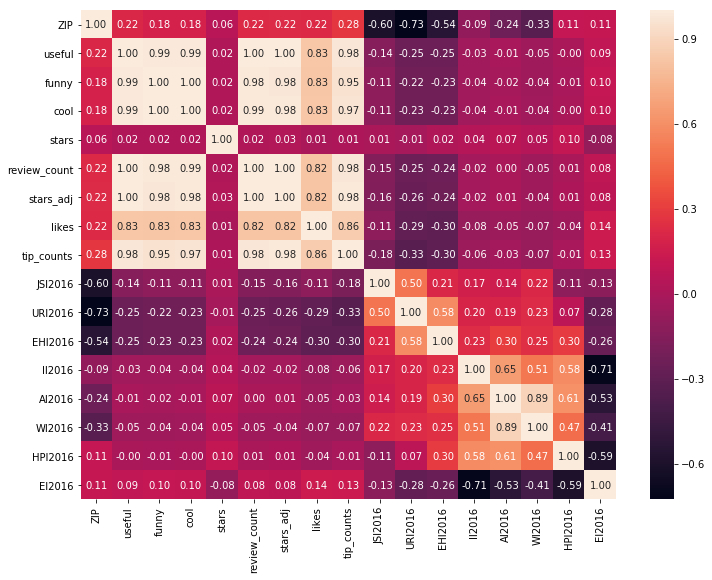

In [50]:
cor = feat_2016.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor,annot=True,fmt='.2f')

In [51]:
feat_2016

,ZIP,useful,funny,cool,stars,review_count,stars_adj,likes,tip_counts,JSI2016,URI2016,EHI2016,II2016,AI2016,WI2016,HPI2016,EI2016
0,2224,0.0,0.0,0.0,2.000000,2.0,0.000454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5440,0.0,0.0,0.0,3.666667,3.0,0.001248,0.0,2.0,114.391667,87.691667,108.600,413.9,272.0,362.2,115.6,72.0
2,5452,5.0,3.0,3.0,4.272727,11.0,0.005331,0.0,1.0,125.483333,139.075000,161.600,662.3,431.1,551.4,155.9,30.1
3,12919,37.0,1.0,0.0,2.642857,14.0,0.004197,NaN,NaN,105.550000,103.658333,122.200,433.3,299.3,360.4,71.8,116.0
4,12923,0.0,0.0,0.0,5.000000,2.0,0.001134,0.0,1.0,116.675000,102.333333,125.775,353.1,265.2,350.8,51.0,201.1
5,12958,1.0,0.0,0.0,5.000000,1.0,0.000567,NaN,NaN,108.400000,104.250000,125.775,411.3,278.1,346.7,61.7,164.1
6,12979,2.0,0.0,3.0,4.250000,8.0,0.003856,NaN,NaN,102.491667,104.966667,125.775,497.0,334.3,407.3,97.3,118.5
7,15003,55.0,13.0,20.0,4.215190,79.0,0.037770,0.0,12.0,178.608333,131.391667,87.050,281.1,310.6,378.3,51.7,140.7
8,15009,0.0,0.0,0.0,1.000000,1.0,0.000113,NaN,NaN,176.283333,134.608333,92.250,599.1,377.7,483.4,91.5,80.6
9,15015,2.0,3.0,0.0,3.000000,2.0,0.000681,NaN,NaN,154.441667,129.433333,118.950,612.8,1054.0,2239.4,148.2,33.0


C:\Users\PL_DELL3688_TWO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


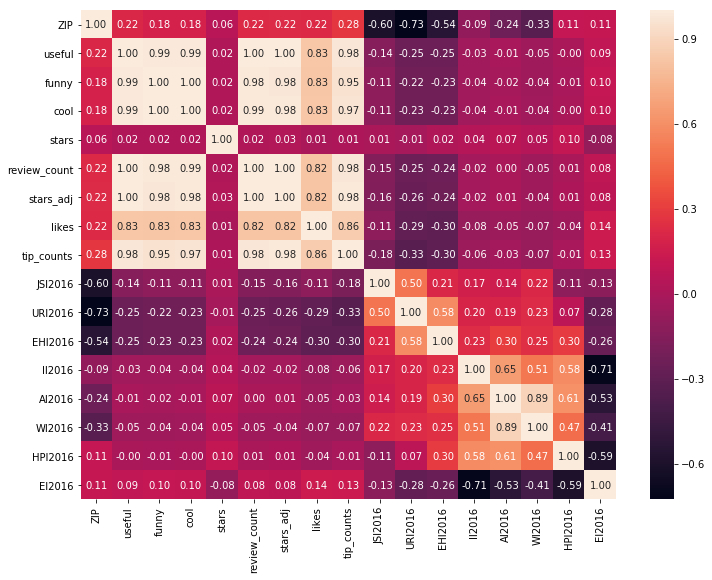

In [52]:
df_rev_com_2016 = df_bus_rev_2016[['postal_code','useful','funny','cool']].groupby('postal_code').sum()
df_rev_com_2016 = df_rev_com_2016.reset_index()
df_stars_2016 = df_bus_rev_2016[['postal_code','stars']].groupby('postal_code').mean()
df_stars_2016 = df_stars_2016.reset_index()
df_rev_cnt_2016 = df_bus_rev_2016[['postal_code','review_count']].groupby('postal_code').count()
df_rev_cnt_2016 = df_rev_cnt_2016.reset_index()
df_feat_2016 = reduce(lambda left,right: pd.merge(left,right,on='postal_code'), [df_rev_com_2016,df_stars_2016,df_rev_cnt_2016])
df_feat_2016['stars_adj'] = df_feat_2016['stars'] * df_feat_2016['review_count']/df_bus_rev_2016.shape[0] * 100
df_likes_2016 = df_bus_tip_2016[['postal_code','likes']].groupby('postal_code').sum()
df_likes_2016 = df_likes_2016.reset_index()
df_bus_tip_2016['tip_counts'] = 1
df_tip_cnt_2016 = df_bus_tip_2016[['postal_code','tip_counts']].groupby('postal_code').sum()
df_tip_cnt_2016 = df_tip_cnt_2016.reset_index()
df_tip_feat_2016 = df_likes_2016.merge(df_tip_cnt_2016,on='postal_code')
df_feat_2016 = df_feat_2016.merge(df_tip_feat_2016, how='outer',on='postal_code')
df_feat_2016 = df_feat_2016.rename(columns={'postal_code':'ZIP'})
df_feat_2016['ZIP'] = df_feat_2016['ZIP'].astype(int)
indices_2016 = [df_feat_2016,df_jsi[['ZIP','JSI2016']],df_uri[['ZIP','URI2016']],df_ehi[['ZIP','EHI2016']],df_ii[['ZIP','II2016']],\
                df_ai[['ZIP','AI2016']],df_wi[['ZIP','WI2016']],df_hpi[['ZIP','HPI2016']],df_ei[['ZIP','EI2016']]]
feat_2016 = reduce(lambda left,right:pd.merge(left,right,how='left',on='ZIP'),indices_2016)
cor = feat_2016.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor,annot=True,fmt='.2f')

In [53]:
def extractFeature(df_bus_rev,df_bus_tip,year):
    df_rev_com = df_bus_rev[['postal_code','useful','funny','cool']].groupby('postal_code').sum()
    df_rev_com = df_rev_com.reset_index()
    df_stars = df_bus_rev[['postal_code','stars']].groupby('postal_code').mean()
    df_stars = df_stars.reset_index()
    df_rev_cnt = df_bus_rev[['postal_code','review_count']].groupby('postal_code').count()
    df_rev_cnt = df_rev_cnt.reset_index()
    df_feat = reduce(lambda left,right: pd.merge(left,right,on='postal_code'), [df_rev_com,df_stars,df_rev_cnt])
    df_feat['stars_adj'] = df_feat['stars'] * df_feat['review_count']/df_bus_rev.shape[0] * 100
    df_likes = df_bus_tip[['postal_code','likes']].groupby('postal_code').sum()
    df_likes = df_likes.reset_index()
    df_bus_tip['tip_counts'] = 1
    df_tip_cnt = df_bus_tip[['postal_code','tip_counts']].groupby('postal_code').sum()
    df_tip_cnt = df_tip_cnt.reset_index()
    df_tip_feat = df_likes.merge(df_tip_cnt,on='postal_code')
    df_feat = df_feat.merge(df_tip_feat, how='outer',on='postal_code')
    df_feat = df_feat.rename(columns={'postal_code':'ZIP'})
    df_feat['ZIP'] = df_feat['ZIP'].astype(int)
    indices = [df_feat,df_jsi[['ZIP','JSI'+ year]],df_uri[['ZIP','URI'+ year]],df_ehi[['ZIP','EHI'+ year]],df_ii[['ZIP','II'+ year]],\
                    df_ai[['ZIP','AI'+ year]],df_wi[['ZIP','WI'+ year]],df_hpi[['ZIP','HPI'+ year]],df_ei[['ZIP','EI'+ year]]]
    return(reduce(lambda left,right:pd.merge(left,right,how='left',on='ZIP'),indices))

def plotcorrmat(df):
    cor = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(cor,annot=True,fmt='.2f')

In [54]:
whole = [feat_2016,extractFeature(df_bus_rev_2015,df_bus_tip_2015,'2015'),
        extractFeature(df_bus_rev_2014,df_bus_tip_2014,'2014'),
        extractFeature(df_bus_rev_2013,df_bus_tip_2013,'2013'),
        extractFeature(df_bus_rev_2012,df_bus_tip_2012,'2012'),
        extractFeature(df_bus_rev_2011,df_bus_tip_2011,'2011'),
        extractFeature(df_bus_rev_2010,df_bus_tip_2010,'2010'),
        extractFeature(df_bus_rev_2009,df_bus_tip_2009,'2009'),
        extractFeature(df_bus_rev_2008,df_bus_tip_2015,'2008')]

C:\Users\PL_DELL3688_TWO\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [55]:
for df in whole:
    df.columns = ['ZIP', 'useful', 'funny', 'cool', 'stars', 'review_count', 'stars_adj',
       'likes', 'tip_counts', 'JSI', 'URI', 'EHI', 'II','AI', 'WI', 'HPI', 'EI']
    

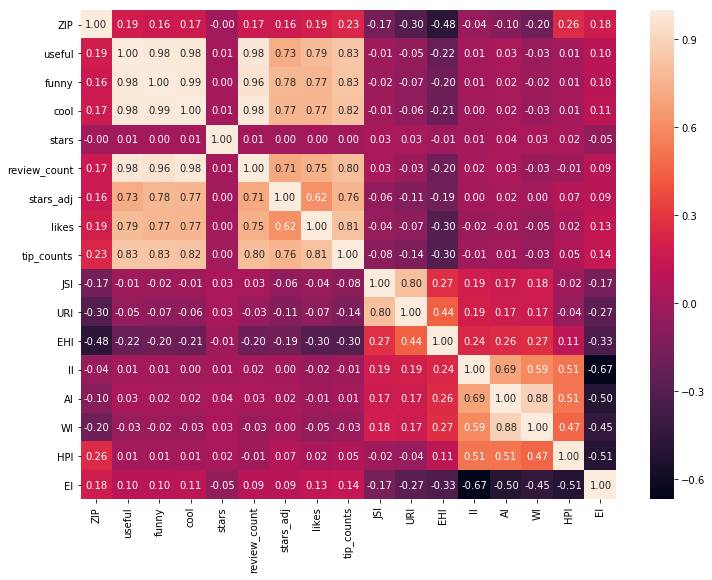

In [56]:
plotcorrmat(pd.concat(whole,axis=0))

In [57]:
df_whole = pd.concat(whole,axis=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273E40A5C18>]],
      dtype=object)

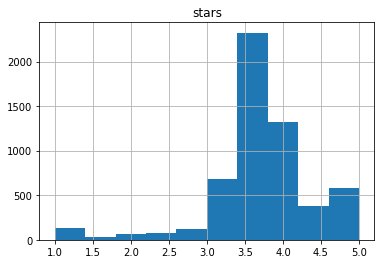

In [58]:
df_whole[['stars']].hist()

In [59]:
df_whole.columns

Index(['ZIP', 'useful', 'funny', 'cool', 'stars', 'review_count', 'stars_adj',
       'likes', 'tip_counts', 'JSI', 'URI', 'EHI', 'II', 'AI', 'WI', 'HPI',
       'EI'],
      dtype='object')

In [60]:
df_whole.describe()

,ZIP,useful,funny,cool,stars,review_count,stars_adj,likes,tip_counts,JSI,URI,EHI,II,AI,WI,HPI,EI
count,5899.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,4597.000000,4597.000000,4679.000000,4677.000000,4679.000000,4679.000000,4679.000000,4679.000000,4679.000000,4679.000000
mean,55882.994914,941.752057,350.967957,385.083348,3.710520,595.606899,0.584207,3.685229,208.209920,67.519148,97.646779,91.577410,415.088609,247.725005,274.914939,114.550267,104.825069
std,28827.376809,3644.010153,1693.754004,1799.724756,0.714245,2451.385442,2.557903,15.854467,673.362563,36.766037,23.208070,24.984727,159.646643,176.192844,229.013121,68.142464,51.327477
min,2224.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000113,0.000000,1.000000,1.266667,-9.908333,19.475000,13.400000,10.000000,10.000000,22.300000,22.600000
25%,28212.000000,10.000000,3.000000,3.000000,3.497790,6.000000,0.007703,0.000000,4.000000,37.675000,86.866667,79.287500,327.000000,159.295000,149.650000,70.450000,63.300000
50%,53562.000000,93.000000,31.000000,29.000000,3.715068,49.000000,0.073725,0.000000,32.000000,63.150000,101.000000,91.825000,400.400000,207.280000,233.700000,100.200000,95.200000
75%,85275.000000,622.500000,197.500000,198.000000,4.000000,360.000000,0.432178,2.000000,171.000000,90.825000,113.025000,108.800000,524.600000,278.960000,337.400000,139.650000,139.600000
max,95966.000000,108790.000000,54238.000000,59479.000000,5.000000,78574.000000,82.750914,436.000000,19123.000000,195.433333,146.225000,270.800000,1083.600000,2252.500000,2864.000000,926.600000,225.800000


In [61]:
for df in whole:
    df['review_comment'] = df['useful'] + df['funny'] + df['cool']

In [62]:
l = whole[0][['stars','review_count']].quantile([.5,.25])

In [63]:
stars = []
review_count = []
for data in whole:
    stars.append(data['stars'].quantile(.5))
    review_count.append(data['review_count'].quantile(.5))

stars = stars[::-1]
review_count = review_count[::-1]

year = [2008,2009,2010,2011,2012,2013,2014,2015,2016]

In [64]:
def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('Year')
   
    ax2.plot(time, data2, color=c2)
   
    return ax1, ax2

Text(0.5,1,'Median Change by Year')

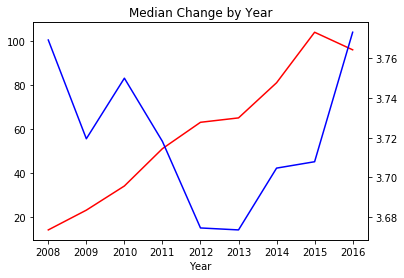

In [65]:
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, year, review_count, stars, 'r', 'b')
plt.title('Median Change by Year')

Text(0.5,1,'25 Percentile Change by Year')

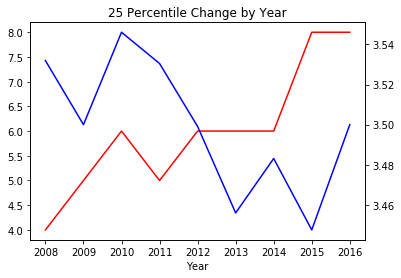

In [66]:
stars = []
review_count = []
for data in whole:
    stars.append(data['stars'].quantile(.25))
    review_count.append(data['review_count'].quantile(.25))

stars = stars[::-1]
review_count = review_count[::-1]

fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, year, review_count, stars, 'r', 'b')
plt.title('25 Percentile Change by Year')

Text(0.5,1,'Median Change by Year')

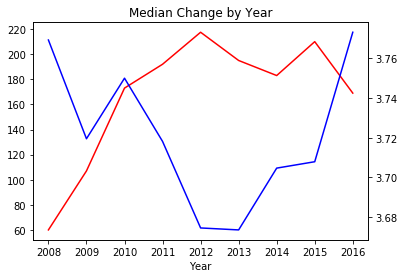

In [67]:
stars = []
review_count = []
review_comment = []
for data in whole:
    stars.append(data['stars'].quantile(.5))
    review_comment.append(data['review_comment'].quantile(.5))

stars = stars[::-1]
review_comment = review_comment[::-1]

fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, year, review_comment, stars, 'r', 'b')
plt.title('Median Change by Year')

In [205]:
jsi=[]
uri=[]
ehi=[]
ii=[]
ai=[]
wi=[]
hpi=[]
ei=[]

for index,col in zip([jsi,uri,ehi,ii,ai,wi,hpi,ei],['JSI','URI','EHI','II','AI','WI','HPI','EI']):
    index.append([data[col].quantile(.25) for data in whole][::-1])
    index.append([data[col].quantile(.5) for data in whole][::-1])
    index.append([data[col].quantile(.75) for data in whole][::-1])



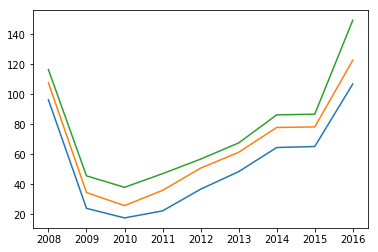

In [69]:
for i in range(3):
    plt.plot(year,jsi[i])

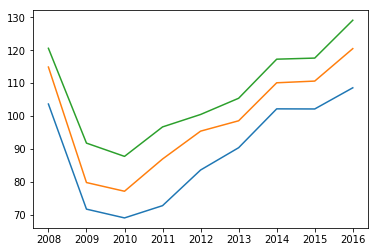

In [70]:
for i in range(3):
    plt.plot(year,uri[i])

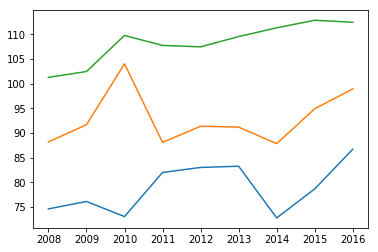

In [71]:
for i in range(3):
    plt.plot(year,ehi[i])

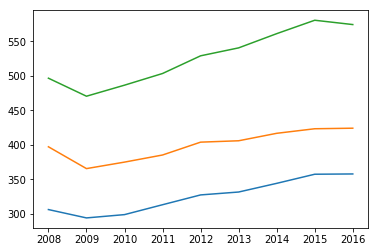

In [72]:
for i in range(3):
    plt.plot(year,ii[i])

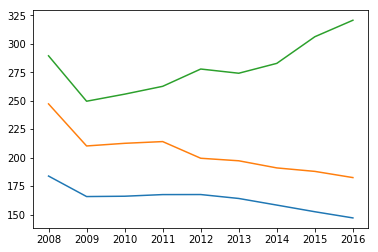

In [73]:
for i in range(3):
    plt.plot(year,ai[i])

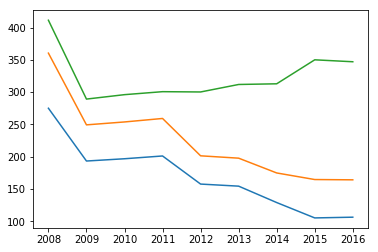

In [74]:
for i in range(3):
    plt.plot(year,wi[i])

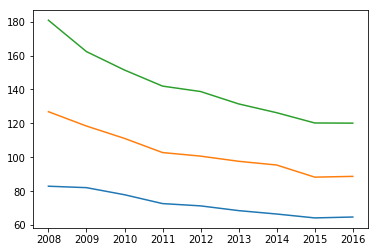

In [75]:
for i in range(3):
    plt.plot(year,hpi[i])

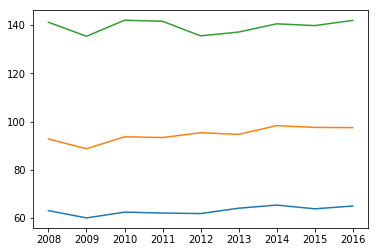

In [76]:
for i in range(3):
    plt.plot(year,ei[i])

In [77]:
review_cnt = pd.Series(review_count)
housing_price_index = pd.Series(hpi[1])

d = review_cnt.to_frame('review_count')
d['HPI'] = housing_price_index

d.corr()

,review_count,HPI
review_count,NaN,NaN
HPI,NaN,1.0


[3.781552581056937, 3.729133944693416, 3.771368214994897, 3.714706689738424, 3.7011522325482105, 3.664948567070592, 3.6860160408184734, 3.670379172727063, 3.719103418533582]


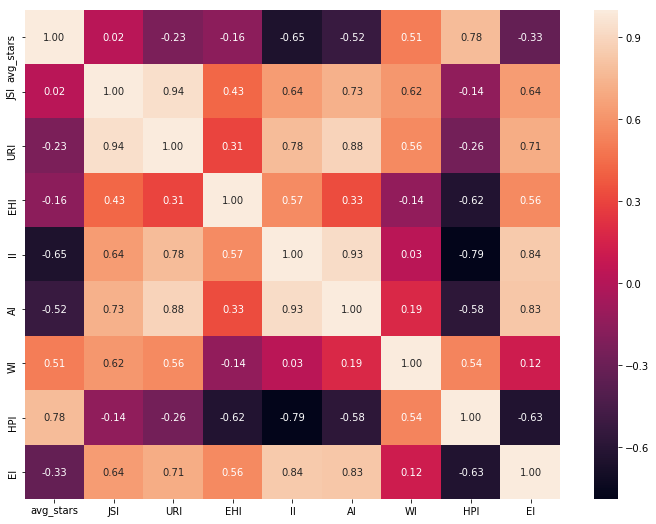

In [208]:
stars = []
review_comment = []
for data in whole:
    stars.append(data['stars'].quantile(.5))
    review_comment.append(data['review_comment'].quantile(.5))
stars = stars[::-1]
review_comment = review_comment[::-1]

avg_stars = pd.Series(stars)
JSI = pd.Series(jsi[1])
URI = pd.Series(uri[1])
EHI = pd.Series(ehi[1])
II = pd.Series(ii[1])
AI = pd.Series(ai[1])
WI = pd.Series(wi[1])
HPI = pd.Series(hpi[1])
EI = pd.Series(ei[1])

d = avg_stars.to_frame('avg_stars')
d['JSI'] = JSI
d['URI'] = URI
d['EHI'] = EHI
d['II'] = II
d['AI'] = AI
d['WI'] = WI
d['HPI'] = HPI
d['EI'] = EI


plotcorrmat(d)
plt.savefig('correlation_median_indices_by_year.png')

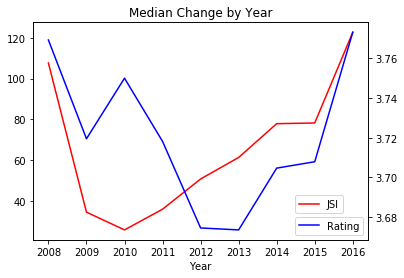

In [199]:
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, year, jsi[1], stars, 'r', 'b')
ax1.legend(['JSI'],loc='lower right', bbox_to_anchor=(0.94, 0.1))
ax2.legend(['Rating'],loc=4)
plt.title('Median Change by Year')
plt.savefig('Median Change by Year.png')

Text(0.5,1,'Median Change by Year')

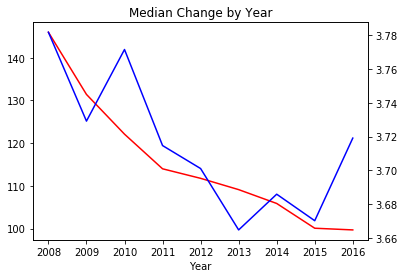

In [209]:
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, year, hpi[1], stars, 'r', 'b')
#ax1.legend(['HPI'],loc='lower right', bbox_to_anchor=(0.94, 0.1))
#ax2.legend(['Rating'],loc=4)
plt.title('Median Change by Year')

Text(0.5,1,'Median Change by Year')

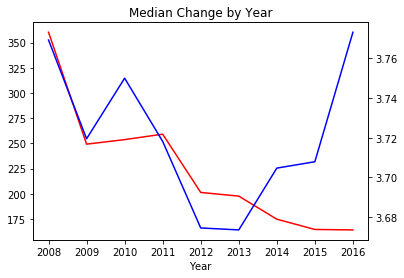

In [80]:
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, year, wi[1], stars, 'r', 'b')
plt.title('Median Change by Year')

In [81]:
df_whole['stars'].describe()

count    5711.000000
mean        3.710520
std         0.714245
min         1.000000
25%         3.497790
50%         3.715068
75%         4.000000
max         5.000000
Name: stars, dtype: float64

In [82]:
df_data = df_whole[-df_whole['stars'].isnull()]

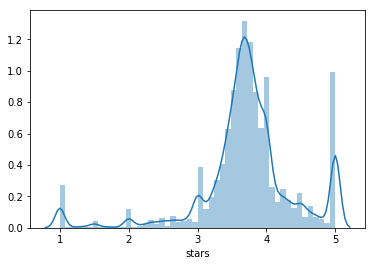

In [83]:
sns.distplot(df_data['stars'])


In [84]:
print("Skewness: %f" % df_data['stars'].skew())
print("Kurtosis: %f" % df_data['stars'].kurt())

Skewness: -1.146316
Kurtosis: 3.839331


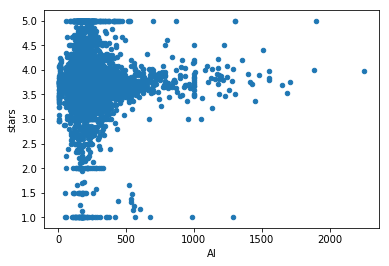

In [85]:
var = 'AI'
data = pd.concat([df_data['stars'], df_data[var]], axis=1)
data.plot.scatter(x=var, y='stars')

In [86]:
whole[0]

,ZIP,useful,funny,cool,stars,review_count,stars_adj,likes,tip_counts,JSI,URI,EHI,II,AI,WI,HPI,EI,review_comment
0,2224,0.0,0.0,0.0,2.000000,2.0,0.000454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,5440,0.0,0.0,0.0,3.666667,3.0,0.001248,0.0,2.0,114.391667,87.691667,108.600,413.9,272.0,362.2,115.6,72.0,0.0
2,5452,5.0,3.0,3.0,4.272727,11.0,0.005331,0.0,1.0,125.483333,139.075000,161.600,662.3,431.1,551.4,155.9,30.1,11.0
3,12919,37.0,1.0,0.0,2.642857,14.0,0.004197,NaN,NaN,105.550000,103.658333,122.200,433.3,299.3,360.4,71.8,116.0,38.0
4,12923,0.0,0.0,0.0,5.000000,2.0,0.001134,0.0,1.0,116.675000,102.333333,125.775,353.1,265.2,350.8,51.0,201.1,0.0
5,12958,1.0,0.0,0.0,5.000000,1.0,0.000567,NaN,NaN,108.400000,104.250000,125.775,411.3,278.1,346.7,61.7,164.1,1.0
6,12979,2.0,0.0,3.0,4.250000,8.0,0.003856,NaN,NaN,102.491667,104.966667,125.775,497.0,334.3,407.3,97.3,118.5,5.0
7,15003,55.0,13.0,20.0,4.215190,79.0,0.037770,0.0,12.0,178.608333,131.391667,87.050,281.1,310.6,378.3,51.7,140.7,88.0
8,15009,0.0,0.0,0.0,1.000000,1.0,0.000113,NaN,NaN,176.283333,134.608333,92.250,599.1,377.7,483.4,91.5,80.6,0.0
9,15015,2.0,3.0,0.0,3.000000,2.0,0.000681,NaN,NaN,154.441667,129.433333,118.950,612.8,1054.0,2239.4,148.2,33.0,5.0


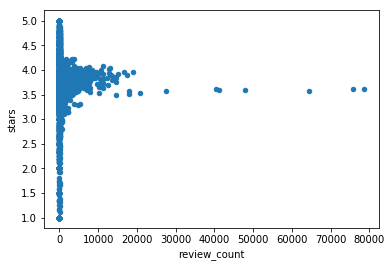

In [87]:
var = 'review_count'
data = pd.concat([df_data['stars'], df_data[var]], axis=1)
data.plot.scatter(x=var, y='stars');

In [88]:
df_data['review_count'].describe()

count     5711.000000
mean       595.606899
std       2451.385442
min          1.000000
25%          6.000000
50%         49.000000
75%        360.000000
max      78574.000000
Name: review_count, dtype: float64

In [89]:
df_data = df_data[df_data['review_count']>10]

In [90]:
df_data[['review_count','ZIP']].groupby('review_count').count()

,ZIP
review_count,
11.0,70
12.0,50
13.0,59
14.0,37
15.0,51
16.0,34
17.0,37
18.0,54
19.0,35


In [91]:
df_data

,ZIP,useful,funny,cool,stars,review_count,stars_adj,likes,tip_counts,JSI,URI,EHI,II,AI,WI,HPI,EI
2,5452,5.0,3.0,3.0,4.272727,11.0,0.005331,0.0,1.0,125.483333,139.075000,161.600,662.3,431.10,551.4,155.9,30.1
3,12919,37.0,1.0,0.0,2.642857,14.0,0.004197,NaN,NaN,105.550000,103.658333,122.200,433.3,299.30,360.4,71.8,116.0
7,15003,55.0,13.0,20.0,4.215190,79.0,0.037770,0.0,12.0,178.608333,131.391667,87.050,281.1,310.60,378.3,51.7,140.7
10,15017,665.0,138.0,219.0,3.402208,634.0,0.244653,0.0,91.0,151.991667,128.433333,114.025,630.4,450.00,540.9,90.1,58.7
12,15024,23.0,10.0,10.0,3.656250,32.0,0.013270,0.0,3.0,152.475000,128.641667,115.125,653.2,398.50,476.9,75.0,73.7
13,15025,43.0,15.0,9.0,3.413043,46.0,0.017807,0.0,8.0,149.050000,129.066667,114.025,630.2,355.20,422.5,69.6,89.4
14,15026,27.0,6.0,3.0,3.384615,13.0,0.004991,NaN,NaN,181.466667,130.716667,99.500,596.2,333.10,439.8,100.3,82.3
17,15034,20.0,4.0,3.0,2.529412,17.0,0.004877,0.0,3.0,148.350000,128.841667,112.325,297.7,238.60,286.2,47.9,117.3
19,15037,37.0,6.0,12.0,3.606061,66.0,0.026995,0.0,16.0,148.950000,129.066667,112.325,486.0,320.60,394.5,63.5,77.2
21,15044,167.0,26.0,72.0,3.744186,258.0,0.109566,1.0,46.0,152.241667,128.941667,114.025,675.8,648.40,1401.2,128.7,42.3


In [92]:
df_data = df_data[-df_data.JSI.isnull()]

In [93]:
zip_count = df_data[['ZIP','stars']].groupby('ZIP').count()

zipcode = zip_count[zip_count['stars']==9].index

df_corr_zip = df_data[df_data.ZIP==zipcode[0]].corr().loc[['stars'],['JSI','URI','EHI','II','AI','WI','HPI','EI']]
df_corr_zip = df_corr_zip.rename(index={'stars':zipcode[0]})

for i in range(1,len(zipcode)):
    df_corr = df_data[df_data.ZIP==zipcode[i]].corr().loc[['stars'],['JSI','URI','EHI','II','AI','WI','HPI','EI']]
    df_corr = df_corr.rename(index={'stars':zipcode[i]})
    df_corr_zip = df_corr_zip.append(df_corr)

In [94]:
df_corr_zip['econ_index'] = (df_corr_zip['JSI'] + df_corr_zip['URI'] + df_corr_zip['EHI']) / 3
df_corr_zip['income_index'] = (df_corr_zip['II'] + df_corr_zip['AI'] + df_corr_zip['WI']) / 3

In [95]:
df_corr_zip[df_corr_zip['income_index'].isnull()]

,JSI,URI,EHI,II,AI,WI,HPI,EI,econ_index,income_index
85006,0.374109,0.461505,-0.253958,-2.115069e-15,0.890026,NaN,-0.802314,-0.574555,0.193885,NaN
85008,-0.092379,-0.198153,-0.095321,-6.267781e-15,0.648611,NaN,0.148233,0.128463,-0.128618,NaN
85009,0.198733,0.099532,-0.024047,-8.184552e-16,NaN,NaN,0.694448,0.120344,0.091406,NaN
85015,-0.242129,-0.406903,0.207961,-2.406327e-15,0.430933,NaN,0.850977,0.663480,-0.147023,NaN
85017,0.534732,0.418665,-0.432304,-1.650409e-15,NaN,NaN,0.547775,-0.187897,0.173698,NaN
85035,-0.606279,-0.697690,0.407629,6.951327e-16,NaN,NaN,0.605533,0.697252,-0.298780,NaN
85040,0.527695,0.535697,-0.203151,5.623619e-15,0.609915,NaN,-0.091032,-0.405857,0.286747,NaN
85301,-0.216100,-0.327890,0.764220,2.631895e-15,NaN,NaN,0.381891,0.438193,0.073410,NaN


In [96]:
rank_econ = df_corr_zip[['econ_index']].sort_values(by='econ_index',ascending=False)
rank = []
for i in range(len(rank_econ)):
    rank.append(i+1)
rank_econ['rank_econ_index'] = rank

In [97]:
rank_econ

,econ_index,rank_econ_index
89074,0.800988,1
53562,0.733020,2
15217,0.705529,3
89117,0.691188,4
44102,0.668400,5
89005,0.664689,6
15222,0.662142,7
89032,0.647696,8
53593,0.642553,9
15232,0.631923,10


In [98]:
rank_income = df_corr_zip[['income_index']].sort_values(by='income_index',ascending=False)
rank = []
for i in range(len(rank_income)):
    rank.append(i+1)
rank_income['rank_income_index'] = rank

In [99]:
rank_income

,income_index,rank_income_index
15217,0.903013,1
85284,0.858454,2
15222,0.836265,3
85018,0.830359,4
85201,0.826035,5
15203,0.795215,6
85254,0.784698,7
44022,0.726660,8
85253,0.710055,9
15232,0.709314,10


In [100]:
rank_HPI = df_corr_zip[['HPI']].sort_values(by='HPI',ascending=False)
rank = []
for i in range(len(rank_HPI)):
    rank.append(i+1)
rank_HPI['rank_HPI'] = rank

rank_EI = df_corr_zip[['EI']].sort_values(by='EI',ascending=False)
rank = []
for i in range(len(rank_EI)):
    rank.append(i+1)
rank_EI['rank_EI'] = rank

In [101]:
def getzip(df):
    df = df.reset_index()
    df = df.rename(columns={'index':'ZIP'})
    return(df)



In [102]:
df_corr_zip = getzip(df_corr_zip)
rank_econ = getzip(rank_econ)
rank_income = getzip(rank_income)
rank_HPI = getzip(rank_HPI)
rank_EI = getzip(rank_EI)


In [103]:
rank_income = rank_income[-rank_income['income_index'].isnull()]

In [104]:
df_corr_rank = reduce(lambda left,right: pd.merge(left,right,how='left',on='ZIP'),[df_corr_zip,rank_econ[['ZIP','rank_econ_index']],rank_income[['ZIP','rank_income_index']],rank_HPI[['ZIP','rank_HPI']],rank_EI[['ZIP','rank_EI']]])

In [105]:
zip_county_mapping = pd.read_excel('State, County, ZIP Mapping Table.xlsx')

In [106]:
zip_county_mapping = zip_county_mapping[['Level 3','Level 4']]
zip_county_mapping = zip_county_mapping.rename(columns={'Level 3':'County',
                                               'Level 4':'ZIP'})

In [107]:
zip_county_mapping

,County,ZIP
0,"Autauga County, AL",36003
1,"Autauga County, AL",36006
2,"Autauga County, AL",36051
3,"Autauga County, AL",36066
4,"Autauga County, AL",36067
5,"Autauga County, AL",36749
6,"Baldwin County, AL",36507
7,"Baldwin County, AL",36511
8,"Baldwin County, AL",36526
9,"Baldwin County, AL",36527


In [108]:
df_corr_rank = df_corr_rank.merge(zip_county_mapping, how='left', on='ZIP')

In [109]:
df_business = df_business.rename(columns={'postal_code':'ZIP'})
df_business['ZIP'] = df_business['ZIP'].astype(int)
df_business[['ZIP','city']]

,ZIP,city
0,85044,Ahwatukee
1,15317,McMurray
2,85017,Phoenix
3,85282,Tempe
4,44221,Cuyahoga Falls
6,89128,Las Vegas
7,89128,Las Vegas
8,15090,Wexford
9,89014,Henderson
10,15342,Houston


In [110]:
zip_city_mapping = df_business[['ZIP','city']].drop_duplicates(subset=['ZIP'],keep='first')

In [113]:
len(np.unique(zip_city_mapping['ZIP']))

836

In [114]:
df_corr_rank = df_corr_rank.merge(zip_city_mapping, how='left', on='ZIP')

In [115]:
df_corr_rank

,ZIP,JSI,URI,EHI,II,AI,WI,HPI,EI,econ_index,income_index,rank_econ_index,rank_income_index,rank_HPI,rank_EI,County,city
0,15090,0.238021,0.088529,-0.135078,-0.422132,-0.402047,-0.366902,-0.507338,-0.090705,0.063824,-0.397027,122,184.0,167,135,"Allegheny County, PA",Wexford
1,15108,0.043603,0.020337,-0.740039,-0.560268,-0.416279,-0.150822,-0.631568,-0.361514,-0.225366,-0.375789,193,180.0,180,175,"Allegheny County, PA",Coraopolis
2,15120,-0.247965,-0.186555,0.886300,0.524487,0.337327,0.205473,0.383458,0.376961,0.150593,0.355763,95,46.0,53,52,"Allegheny County, PA",Homestead
3,15146,0.003839,-0.059988,-0.783237,-0.600849,-0.452377,0.041797,-0.777921,-0.342401,-0.279795,-0.337143,202,174.0,204,170,"Allegheny County, PA",Monroeville
4,15201,-0.058007,-0.163313,0.477500,0.297208,0.095582,0.086338,0.029704,0.215656,0.085393,0.159709,117,79.0,102,72,"Allegheny County, PA",Pittsburgh
5,15203,0.388745,0.494917,0.707134,0.921391,0.857380,0.606873,0.879070,0.759623,0.530265,0.795215,24,6.0,1,11,"Allegheny County, PA",Pittsburgh
6,15205,0.240261,0.155244,-0.751683,-0.522658,-0.317320,0.091502,-0.855546,-0.234143,-0.118726,-0.249492,163,160.0,222,157,"Allegheny County, PA",Pittsburgh
7,15206,0.286278,0.187003,-0.668438,-0.480430,-0.210458,-0.076332,-0.309694,-0.517954,-0.065052,-0.255740,150,163.0,151,203,"Allegheny County, PA",Pittsburgh
8,15211,0.314537,0.355964,-0.238132,0.055071,0.260427,0.184522,-0.665374,-0.067476,0.144123,0.166673,96,77.0,189,131,"Allegheny County, PA",Pittsburgh
9,15212,0.172414,0.107911,-0.814601,-0.687519,-0.501157,-0.389839,-0.651435,-0.359706,-0.178092,-0.526172,181,198.0,186,174,"Allegheny County, PA",Pittsburgh


In [116]:
df_corr_rank.to_csv('zip_corr_rank.csv',index=False)

In [117]:
df_corr_rank[['rank_econ_index','rank_income_index','rank_HPI','rank_EI','County']].groupby('County').mean()

,rank_econ_index,rank_income_index,rank_HPI,rank_EI
County,,,,
"Allegheny County, PA",119.000000,113.545455,126.863636,113.454545
"Cabarrus County, NC",209.000000,144.000000,181.000000,100.000000
"Champaign County, IL",141.666667,109.333333,82.333333,128.166667
"Chester County, PA",61.000000,63.000000,100.000000,82.000000
"Clark County, NV",85.024390,137.170732,134.975610,120.463415
"Cuyahoga County, OH",142.666667,107.750000,71.000000,97.916667
"Dane County, WI",81.500000,87.500000,91.416667,116.000000
"Gaston County, NC",140.500000,167.500000,133.000000,115.500000
"Lake County, OH",77.000000,176.000000,190.000000,201.000000


In [118]:
mean_stars = df_data[['ZIP','stars']].groupby('ZIP').mean()
mean_stars = mean_stars.reset_index()

In [119]:
df_corr_rank = df_corr_rank.merge(mean_stars, how='left', on='ZIP')

In [120]:
rank_by_county = df_corr_rank[['rank_econ_index','rank_income_index','rank_HPI','rank_EI','County','stars']].groupby('County').mean()

rank_by_county

,rank_econ_index,rank_income_index,rank_HPI,rank_EI,stars
County,,,,,
"Allegheny County, PA",119.000000,113.545455,126.863636,113.454545,3.737777
"Cabarrus County, NC",209.000000,144.000000,181.000000,100.000000,3.459244
"Champaign County, IL",141.666667,109.333333,82.333333,128.166667,3.552249
"Chester County, PA",61.000000,63.000000,100.000000,82.000000,3.608475
"Clark County, NV",85.024390,137.170732,134.975610,120.463415,3.735443
"Cuyahoga County, OH",142.666667,107.750000,71.000000,97.916667,3.675384
"Dane County, WI",81.500000,87.500000,91.416667,116.000000,3.683323
"Gaston County, NC",140.500000,167.500000,133.000000,115.500000,3.489945
"Lake County, OH",77.000000,176.000000,190.000000,201.000000,3.536486


In [212]:
df_corr_rank

,ZIP,JSI,URI,EHI,II,AI,WI,HPI,EI,econ_index,income_index,rank_econ_index,rank_income_index,rank_HPI,rank_EI,County,city,stars
0,15090,0.238021,0.088529,-0.135078,-0.422132,-0.402047,-0.366902,-0.507338,-0.090705,0.063824,-0.397027,122,184.0,167,135,"Allegheny County, PA",Wexford,3.659298
1,15108,0.043603,0.020337,-0.740039,-0.560268,-0.416279,-0.150822,-0.631568,-0.361514,-0.225366,-0.375789,193,180.0,180,175,"Allegheny County, PA",Coraopolis,3.646736
2,15120,-0.247965,-0.186555,0.886300,0.524487,0.337327,0.205473,0.383458,0.376961,0.150593,0.355763,95,46.0,53,52,"Allegheny County, PA",Homestead,3.367732
3,15146,0.003839,-0.059988,-0.783237,-0.600849,-0.452377,0.041797,-0.777921,-0.342401,-0.279795,-0.337143,202,174.0,204,170,"Allegheny County, PA",Monroeville,3.521920
4,15201,-0.058007,-0.163313,0.477500,0.297208,0.095582,0.086338,0.029704,0.215656,0.085393,0.159709,117,79.0,102,72,"Allegheny County, PA",Pittsburgh,3.953084
5,15203,0.388745,0.494917,0.707134,0.921391,0.857380,0.606873,0.879070,0.759623,0.530265,0.795215,24,6.0,1,11,"Allegheny County, PA",Pittsburgh,3.712327
6,15205,0.240261,0.155244,-0.751683,-0.522658,-0.317320,0.091502,-0.855546,-0.234143,-0.118726,-0.249492,163,160.0,222,157,"Allegheny County, PA",Pittsburgh,3.536873
7,15206,0.286278,0.187003,-0.668438,-0.480430,-0.210458,-0.076332,-0.309694,-0.517954,-0.065052,-0.255740,150,163.0,151,203,"Allegheny County, PA",Pittsburgh,3.855280
8,15211,0.314537,0.355964,-0.238132,0.055071,0.260427,0.184522,-0.665374,-0.067476,0.144123,0.166673,96,77.0,189,131,"Allegheny County, PA",Pittsburgh,3.790910
9,15212,0.172414,0.107911,-0.814601,-0.687519,-0.501157,-0.389839,-0.651435,-0.359706,-0.178092,-0.526172,181,198.0,186,174,"Allegheny County, PA",Pittsburgh,3.760508


In [122]:
corr_mean_by_county = df_corr_rank.groupby('County').mean()


In [214]:
corr_mean_by_county

,County,ZIP,JSI,URI,EHI,II,AI,WI,HPI,EI,econ_index,income_index,rank_econ_index,rank_income_index,rank_HPI,rank_EI,stars,review_count
0,"Allegheny County, PA",15201.727273,0.226799,0.205860,-0.205695,-0.054550,0.018168,0.119765,-0.162541,0.039255,0.075655,0.027795,119.000000,113.545455,126.863636,113.454545,3.737777,170408.0
1,"Cabarrus County, NC",28027.000000,-0.289981,-0.132688,-0.533896,0.370487,-0.168586,-0.703816,-0.633715,0.078613,-0.318855,-0.167305,209.000000,144.000000,181.000000,100.000000,3.459244,10955.0
2,"Champaign County, IL",61823.333333,0.074507,0.056479,-0.184156,-0.029553,0.099772,0.063288,0.171276,-0.106099,-0.017723,0.044502,141.666667,109.333333,82.333333,128.166667,3.552249,28331.0
3,"Chester County, PA",19355.000000,0.376773,0.409229,0.097669,0.313163,0.219272,0.275906,0.043119,0.156517,0.294557,0.269447,61.000000,63.000000,100.000000,82.000000,3.608475,725.0
4,"Clark County, NV",89096.951220,0.301309,0.220965,0.185851,-0.014202,-0.231962,-0.197844,-0.223925,-0.025892,0.236042,-0.148003,85.024390,137.170732,134.975610,120.463415,3.735443,1347488.0
5,"Cuyahoga County, OH",44115.791667,0.030303,-0.036816,-0.158005,-0.210859,0.088154,0.216245,0.287750,0.120161,-0.054839,0.031180,142.666667,107.750000,71.000000,97.916667,3.675384,146431.0
6,"Dane County, WI",53689.333333,0.388587,0.371198,-0.006183,0.077487,0.094109,0.256366,0.106418,0.003944,0.251201,0.142654,81.500000,87.500000,91.416667,116.000000,3.683323,87231.0
7,"Gaston County, NC",28033.000000,-0.083573,-0.089484,0.122648,-0.095488,-0.343104,-0.514331,-0.246539,0.022268,-0.016803,-0.317641,140.500000,167.500000,133.000000,115.500000,3.489945,6366.0
8,"Lake County, OH",44094.000000,0.007032,0.029181,0.686264,0.439082,-0.708722,-0.785207,-0.665767,-0.506201,0.240826,-0.351616,77.000000,176.000000,190.000000,201.000000,3.536486,9785.0
9,"Maricopa County, AZ",85171.582418,0.147715,0.096331,-0.046904,0.199447,0.050636,-0.051014,-0.134679,-0.076369,0.065714,0.063218,118.769231,103.891566,122.626374,129.285714,3.698742,1199082.0


In [123]:
corr_mean_by_county = corr_mean_by_county.reset_index()

In [124]:
df_data = df_data.merge(zip_county_mapping, how='left', on='ZIP')

In [213]:
df_data

,ZIP,useful,funny,cool,stars,review_count,stars_adj,likes,tip_counts,JSI,URI,EHI,II,AI,WI,HPI,EI,County
0,5452,5.0,3.0,3.0,4.272727,11.0,0.005331,0.0,1.0,125.483333,139.075000,161.600,662.3,431.10,551.4,155.9,30.1,"Chittenden County, VT"
1,12919,37.0,1.0,0.0,2.642857,14.0,0.004197,NaN,NaN,105.550000,103.658333,122.200,433.3,299.30,360.4,71.8,116.0,"Clinton County, NY"
2,15003,55.0,13.0,20.0,4.215190,79.0,0.037770,0.0,12.0,178.608333,131.391667,87.050,281.1,310.60,378.3,51.7,140.7,"Beaver County, PA"
3,15017,665.0,138.0,219.0,3.402208,634.0,0.244653,0.0,91.0,151.991667,128.433333,114.025,630.4,450.00,540.9,90.1,58.7,"Allegheny County, PA"
4,15024,23.0,10.0,10.0,3.656250,32.0,0.013270,0.0,3.0,152.475000,128.641667,115.125,653.2,398.50,476.9,75.0,73.7,"Allegheny County, PA"
5,15025,43.0,15.0,9.0,3.413043,46.0,0.017807,0.0,8.0,149.050000,129.066667,114.025,630.2,355.20,422.5,69.6,89.4,"Allegheny County, PA"
6,15026,27.0,6.0,3.0,3.384615,13.0,0.004991,NaN,NaN,181.466667,130.716667,99.500,596.2,333.10,439.8,100.3,82.3,"Beaver County, PA"
7,15034,20.0,4.0,3.0,2.529412,17.0,0.004877,0.0,3.0,148.350000,128.841667,112.325,297.7,238.60,286.2,47.9,117.3,"Allegheny County, PA"
8,15037,37.0,6.0,12.0,3.606061,66.0,0.026995,0.0,16.0,148.950000,129.066667,112.325,486.0,320.60,394.5,63.5,77.2,"Allegheny County, PA"
9,15044,167.0,26.0,72.0,3.744186,258.0,0.109566,1.0,46.0,152.241667,128.941667,114.025,675.8,648.40,1401.2,128.7,42.3,"Allegheny County, PA"


In [125]:
review_cnt_by_county = df_data[['review_count','County']].groupby('County').sum().sort_values(by='review_count',ascending=False)

In [126]:
review_cnt_by_county = review_cnt_by_county.reset_index()

In [127]:
corr_mean_by_county = corr_mean_by_county.merge(review_cnt_by_county,how='left',on='County')

In [128]:
corr_mean_by_county[(corr_mean_by_county['JSI']>0.3) | (corr_mean_by_county['JSI']<-0.3)]

,County,ZIP,JSI,URI,EHI,II,AI,WI,HPI,EI,econ_index,income_index,rank_econ_index,rank_income_index,rank_HPI,rank_EI,stars,review_count
3,"Chester County, PA",19355.000000,0.376773,0.409229,0.097669,0.313163,0.219272,0.275906,0.043119,0.156517,0.294557,0.269447,61.00000,63.000000,100.000000,82.000000,3.608475,725.0
4,"Clark County, NV",89096.951220,0.301309,0.220965,0.185851,-0.014202,-0.231962,-0.197844,-0.223925,-0.025892,0.236042,-0.148003,85.02439,137.170732,134.975610,120.463415,3.735443,1347488.0
6,"Dane County, WI",53689.333333,0.388587,0.371198,-0.006183,0.077487,0.094109,0.256366,0.106418,0.003944,0.251201,0.142654,81.50000,87.500000,91.416667,116.000000,3.683323,87231.0


In [129]:
corr_mean_by_county[(corr_mean_by_county['URI']>0.3) | (corr_mean_by_county['URI']<-0.3)]

,County,ZIP,JSI,URI,EHI,II,AI,WI,HPI,EI,econ_index,income_index,rank_econ_index,rank_income_index,rank_HPI,rank_EI,stars,review_count
3,"Chester County, PA",19355.000000,0.376773,0.409229,0.097669,0.313163,0.219272,0.275906,0.043119,0.156517,0.294557,0.269447,61.0,63.0,100.000000,82.0,3.608475,725.0
6,"Dane County, WI",53689.333333,0.388587,0.371198,-0.006183,0.077487,0.094109,0.256366,0.106418,0.003944,0.251201,0.142654,81.5,87.5,91.416667,116.0,3.683323,87231.0


In [130]:
corr_mean_by_county[(corr_mean_by_county['EHI']>0.3) | (corr_mean_by_county['EHI']<-0.3)]

,County,ZIP,JSI,URI,EHI,II,AI,WI,HPI,EI,econ_index,income_index,rank_econ_index,rank_income_index,rank_HPI,rank_EI,stars,review_count
1,"Cabarrus County, NC",28027.0,-0.289981,-0.132688,-0.533896,0.370487,-0.168586,-0.703816,-0.633715,0.078613,-0.318855,-0.167305,209.0,144.0,181.0,100.0,3.459244,10955.0
8,"Lake County, OH",44094.0,0.007032,0.029181,0.686264,0.439082,-0.708722,-0.785207,-0.665767,-0.506201,0.240826,-0.351616,77.0,176.0,190.0,201.0,3.536486,9785.0
11,"Portage County, OH",44240.0,0.293462,0.077976,-0.492370,-0.201249,0.223648,0.425716,0.271086,0.806314,-0.040311,0.149372,144.0,83.0,66.0,6.0,3.644436,5509.0


In [131]:
selected_corr_mean_by_county = corr_mean_by_county.iloc[[1,3,4,6,7,8,11,12,13]]

In [132]:
selected_corr_mean_by_county['econ_index'] = (selected_corr_mean_by_county['JSI'] + selected_corr_mean_by_county['URI']) / 2

C:\Users\PL_DELL3688_TWO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
df_index_county = selected_corr_mean_by_county[['econ_index','EHI','income_index','HPI','EI']]

In [134]:
df_index_county

,econ_index,EHI,income_index,HPI,EI
1,-0.211334,-0.533896,-0.167305,-0.633715,0.078613
3,0.393001,0.097669,0.269447,0.043119,0.156517
4,0.261137,0.185851,-0.148003,-0.223925,-0.025892
6,0.379892,-0.006183,0.142654,0.106418,0.003944
7,-0.086528,0.122648,-0.317641,-0.246539,0.022268
8,0.018106,0.686264,-0.351616,-0.665767,-0.506201
11,0.185719,-0.492370,0.149372,0.271086,0.806314
12,-0.080174,-0.227218,-0.249858,0.273072,0.441933
13,0.022929,-0.068909,0.227041,-0.228980,-0.043731


In [135]:
# df_index_county = corr_mean_by_county.set_index(['County','ZIP'])

In [136]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_index_county)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [137]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-9:-1]

In [138]:
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print( "%d: %s" % (num, ", ".join(df_index_county.columns[i] for i in centroid)))

top features for each cluster:
0: EI, HPI, econ_index, income_index, EHI
1: econ_index, EI, income_index, EHI, HPI
2: EHI, econ_index, income_index, EI, HPI


In [139]:
assigned_cluster = kmeans.predict(df_index_county)

In [140]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, df_index_county.shape[0])[assigned_cluster==i]
    print ("cluster %d:" % i)
    print( selected_corr_mean_by_county[['County']].iloc[cluster])
    print('==========')

cluster 0:
                County
11  Portage County, OH
12   Summit County, OH
cluster 1:
                 County
1   Cabarrus County, NC
3    Chester County, PA
4      Clark County, NV
6       Dane County, WI
7     Gaston County, NC
13     Union County, NC
cluster 2:
            County
8  Lake County, OH


For major city area, there is relatively high correlation bewteen JSI,URI and ratings of business. 

In [141]:
silhouette_score(df_index_county, assigned_cluster)

0.2609012966184012

In [142]:
selected_corr_mean_by_county

,County,ZIP,JSI,URI,EHI,II,AI,WI,HPI,EI,econ_index,income_index,rank_econ_index,rank_income_index,rank_HPI,rank_EI,stars,review_count
1,"Cabarrus County, NC",28027.000000,-0.289981,-0.132688,-0.533896,0.370487,-0.168586,-0.703816,-0.633715,0.078613,-0.211334,-0.167305,209.00000,144.000000,181.000000,100.000000,3.459244,10955.0
3,"Chester County, PA",19355.000000,0.376773,0.409229,0.097669,0.313163,0.219272,0.275906,0.043119,0.156517,0.393001,0.269447,61.00000,63.000000,100.000000,82.000000,3.608475,725.0
4,"Clark County, NV",89096.951220,0.301309,0.220965,0.185851,-0.014202,-0.231962,-0.197844,-0.223925,-0.025892,0.261137,-0.148003,85.02439,137.170732,134.975610,120.463415,3.735443,1347488.0
6,"Dane County, WI",53689.333333,0.388587,0.371198,-0.006183,0.077487,0.094109,0.256366,0.106418,0.003944,0.379892,0.142654,81.50000,87.500000,91.416667,116.000000,3.683323,87231.0
7,"Gaston County, NC",28033.000000,-0.083573,-0.089484,0.122648,-0.095488,-0.343104,-0.514331,-0.246539,0.022268,-0.086528,-0.317641,140.50000,167.500000,133.000000,115.500000,3.489945,6366.0
8,"Lake County, OH",44094.000000,0.007032,0.029181,0.686264,0.439082,-0.708722,-0.785207,-0.665767,-0.506201,0.018106,-0.351616,77.00000,176.000000,190.000000,201.000000,3.536486,9785.0
11,"Portage County, OH",44240.000000,0.293462,0.077976,-0.492370,-0.201249,0.223648,0.425716,0.271086,0.806314,0.185719,0.149372,144.00000,83.000000,66.000000,6.000000,3.644436,5509.0
12,"Summit County, OH",44284.500000,-0.025887,-0.134461,-0.227218,-0.358905,-0.274139,-0.116529,0.273072,0.441933,-0.080174,-0.249858,153.00000,156.000000,70.000000,44.000000,3.632764,14881.0
13,"Union County, NC",28104.000000,-0.017267,0.063125,-0.068909,0.077084,0.384743,0.219295,-0.228980,-0.043731,0.022929,0.227041,137.00000,69.000000,134.000000,124.000000,3.614762,5683.0


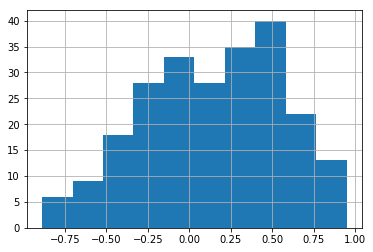

In [143]:
df_corr_zip['JSI'].hist()

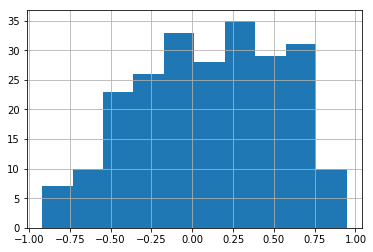

In [144]:
df_corr_zip['URI'].hist()

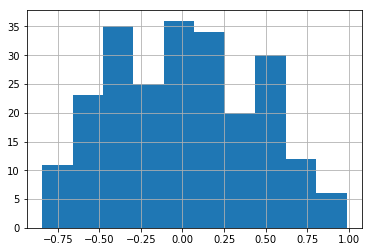

In [145]:
df_corr_zip['EI'].hist()

## Mapping to county level

In [146]:
zip_fips = pd.read_excel('zip_fips_mapping.xlsx', sheet_name='zip_fips_mapping', header=0)
income = pd.read_excel('Income.xlsx', sheet_name='Sheet1',header=0)

In [147]:
zip_fips

,ZIP,FIPS
0,36003,1001
1,36006,1001
2,36008,1001
3,36051,1001
4,36066,1001
5,36067,1001
6,36068,1001
7,36749,1001
8,36507,1003
9,36511,1003


In [148]:
def yearIncome(year):
    return income[['FIPS',year]]

In [149]:
county_feat = []
income_by_year = [yearIncome('2016'),yearIncome('2015'),yearIncome('2014'),yearIncome('2013'),yearIncome('2012'),yearIncome('2011'),
                 yearIncome('2010'),yearIncome('2009'),yearIncome('2008')]
for df,_income in zip(whole,income_by_year):
    df_w_fips = df.merge(zip_fips, how='left', on='ZIP')
    df_county = df_w_fips[['stars','stars_adj','JSI','URI','EHI','II','AI','WI','HPI','EI','FIPS']].groupby('FIPS').mean()
    df_county = df_county.reset_index()
    df_county = df_county.merge(_income, how='left', on='FIPS')
    county_feat.append(df_county)

In [150]:
for year,df_county in zip(['2016','2015','2014','2013','2012','2011','2010','2009','2008'],county_feat):
    df_county.rename(columns={year:'personal_income'},inplace=True)

In [151]:
county_feat[0]

,FIPS,stars,stars_adj,JSI,URI,EHI,II,AI,WI,HPI,EI,personal_income
0,4005,1.000000,0.000113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42057.0
1,4007,4.329825,0.003705,79.937500,79.320833,71.375000,298.250000,130.550000,98.750000,104.500000,134.600000,36294.0
2,4012,2.000000,0.002495,132.650000,2.950000,53.000000,291.000000,135.600000,83.700000,50.700000,121.300000,31781.0
3,4013,3.803143,0.826874,101.151695,107.620621,88.286017,433.399153,276.641525,237.253390,106.669492,99.014407,43628.0
4,4015,5.000000,0.000567,96.808333,87.575000,59.850000,302.200000,128.800000,84.600000,31.800000,176.100000,30045.0
5,4017,3.000000,0.000681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29408.0
6,4019,3.240000,0.018374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39541.0
7,4021,3.890000,0.002768,94.026667,107.396667,69.225000,325.980000,176.480000,115.580000,121.400000,160.620000,27930.0
8,4025,4.428571,0.003516,98.366667,104.533333,70.900000,250.500000,119.300000,83.100000,78.400000,120.200000,36353.0
9,4027,1.000000,0.000227,4.966667,NaN,67.400000,227.100000,102.500000,74.700000,63.900000,210.400000,33365.0


In [210]:
index = []

for col in ['JSI','URI','EHI','II','AI','WI','HPI','EI','personal_income']:

    index.append([data[col].quantile(.5) for data in county_feat][::-1])

stars = []
stars_adj = []
for data in county_feat:
    stars.append(data['stars'].quantile(.5))
    stars_adj.append(data['stars_adj'].quantile(.5))
stars = stars[::-1]
stars_adj = stars_adj[::-1]
avg_stars = pd.Series(stars)
avg_stars_adj = pd.Series(stars_adj)
JSI = pd.Series(index[0])
URI = pd.Series(index[1])
EHI = pd.Series(index[2])
II = pd.Series(index[3])
AI = pd.Series(index[4])
WI = pd.Series(index[5])
HPI = pd.Series(index[6])
EI = pd.Series(index[7])
PI = pd.Series(index[8])

c = avg_stars.to_frame('avg_stars')
c['JSI'] = JSI
c['URI'] = URI
c['EHI'] = EHI
c['II'] = II
c['AI'] = AI
c['WI'] = WI
c['HPI'] = HPI
c['EI'] = EI


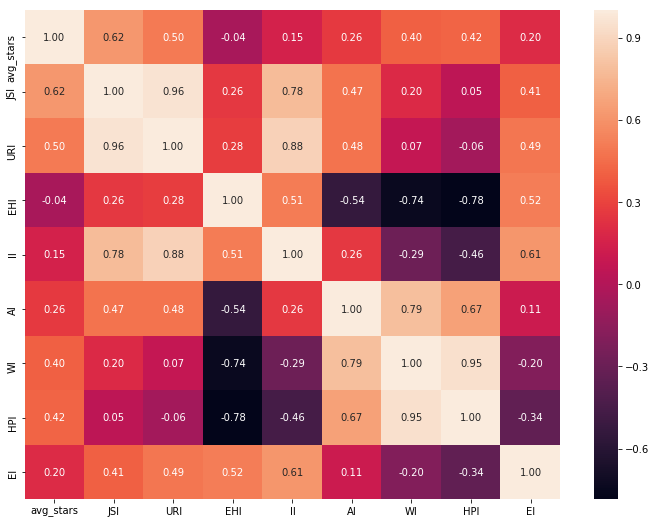

In [211]:
plotcorrmat(c)

Text(0.5,1,'Median Change by Year')

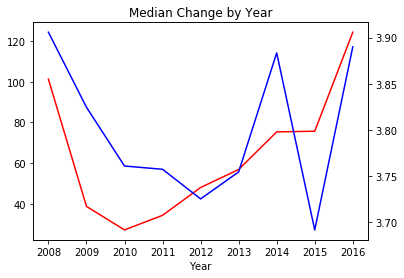

In [154]:
year = [2008,2009,2010,2011,2012,2013,2014,2015,2016]
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, year, index[0], stars, 'r', 'b')
plt.title('Median Change by Year')

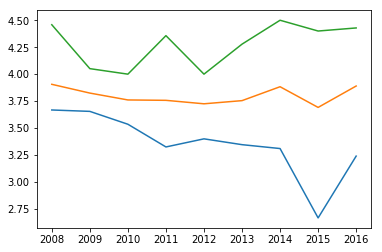

In [155]:

for q in [.25,.5,.75]:
    stars = []
    for data in county_feat:
        stars.append(data['stars'].quantile(q))
    stars = stars[::-1]
    plt.plot(year,stars)

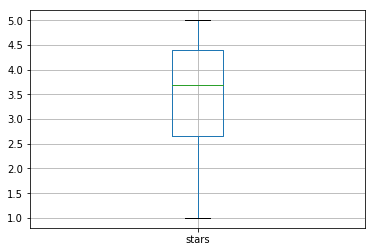

In [156]:
county_feat[1][['stars']].boxplot()

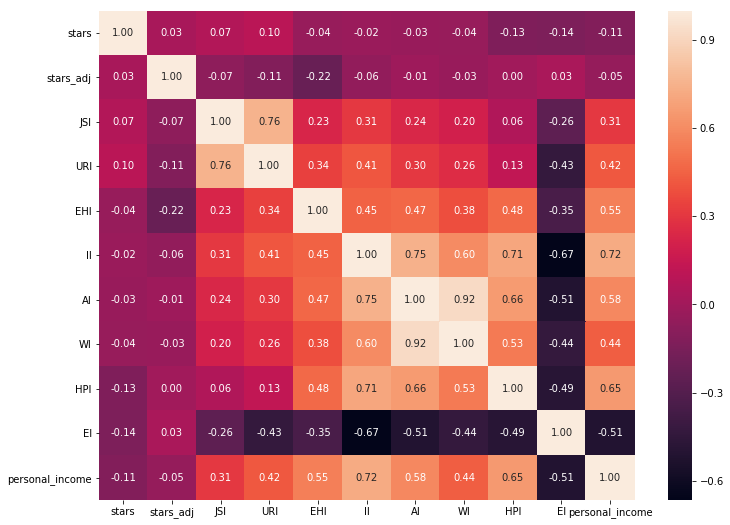

In [157]:
plotcorrmat(pd.concat(county_feat,axis=0))

In [158]:
county_whole = pd.concat(county_feat,axis=0)

In [159]:
county_whole.shape

(572, 12)

In [160]:
county_data = county_whole[-county_whole.stars.isnull()]

county_data = county_data[-county_data.JSI.isnull()]

county_data = county_data[-county_data.URI.isnull()]

In [161]:
# county_data = county_data[-(county_data.stars==5) & -(county_data.stars==1) ]

# county_data['stars'] = stats.boxcox(county_data['stars'])[0]

In [162]:
c

,avg_stars,avg_stars_adj,JSI,URI,EHI,II,AI,WI,HPI,EI,personal_income
0,3.905832,0.034708,101.233929,111.962847,87.712500,402.750000,227.941667,339.675000,123.703333,99.653814,36084.0
1,3.824521,0.029185,38.710833,83.270833,92.943750,365.600000,190.303333,224.460000,108.350000,90.640000,37076.5
2,3.760764,0.023015,27.159099,78.020833,98.587500,375.874490,193.490000,224.688889,103.341667,102.955556,35723.0
3,3.757201,0.007952,34.334140,84.968182,90.816667,387.970833,199.230000,237.500000,103.800000,99.610909,35857.0
4,3.725093,0.008770,47.995833,92.456250,91.015625,406.000000,205.980000,229.001471,102.625000,96.675000,39917.0
5,3.754368,0.004493,56.845833,95.409028,96.262500,415.417949,206.945000,224.181944,101.790000,98.819444,40249.0
6,3.883414,0.002632,75.330000,109.398333,96.875000,427.531092,201.200000,200.500000,100.650000,106.150000,41421.0
7,3.691463,0.002627,75.653333,109.904271,98.425000,434.145000,203.780000,196.900000,97.500000,101.540000,42909.0
8,3.890000,0.002495,124.291667,121.427083,101.977451,446.950000,198.200000,207.700000,96.100000,103.260000,43030.5


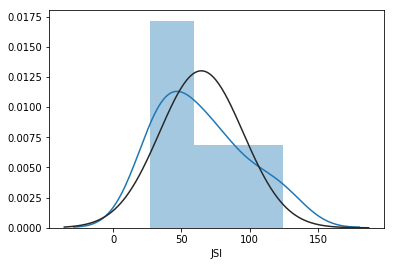

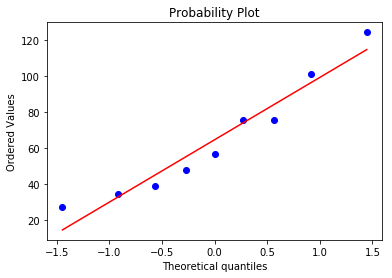

In [163]:
sns.distplot(c['JSI'], fit=norm);
fig = plt.figure()
res = stats.probplot(c['JSI'], plot=plt)

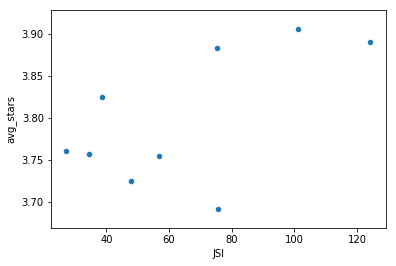

In [164]:
var = 'JSI'
data = pd.concat([c['avg_stars'], c[var]], axis=1)
data.plot.scatter(x=var, y='avg_stars');

In [165]:
county_data

,FIPS,stars,stars_adj,JSI,URI,EHI,II,AI,WI,HPI,EI,personal_income
1,4007,4.329825,0.003705,79.937500,79.320833,71.375000,298.250000,130.550000,98.750000,104.500000,134.600000,36294.0
2,4012,2.000000,0.002495,132.650000,2.950000,53.000000,291.000000,135.600000,83.700000,50.700000,121.300000,31781.0
3,4013,3.803143,0.826874,101.151695,107.620621,88.286017,433.399153,276.641525,237.253390,106.669492,99.014407,43628.0
4,4015,5.000000,0.000567,96.808333,87.575000,59.850000,302.200000,128.800000,84.600000,31.800000,176.100000,30045.0
7,4021,3.890000,0.002768,94.026667,107.396667,69.225000,325.980000,176.480000,115.580000,121.400000,160.620000,27930.0
8,4025,4.428571,0.003516,98.366667,104.533333,70.900000,250.500000,119.300000,83.100000,78.400000,120.200000,36353.0
10,5091,5.000000,0.003970,140.358333,128.208333,42.050000,406.100000,165.900000,195.000000,64.400000,167.200000,32138.0
11,5117,2.000000,0.000227,123.091667,111.400000,59.225000,363.100000,155.600000,181.700000,46.300000,182.200000,33415.0
12,6007,1.121212,0.004197,126.675000,85.933333,102.775000,389.600000,174.400000,126.800000,75.100000,200.200000,41725.0
13,6013,5.000000,0.001134,105.150000,110.175000,143.725000,281.400000,170.000000,106.600000,108.200000,132.500000,70840.0


In [166]:
fips_count = county_data[['FIPS','stars']].groupby('FIPS').count()

fips = fips_count[fips_count['stars']==9].index

df_corr_fips = county_data[county_data.FIPS==fips[0]].corr().loc[['stars'],['JSI','URI','EHI','II','AI','WI','HPI','EI']]
df_corr_fips = df_corr_fips.rename(index={'stars':fips[0]})

for i in range(1,len(fips)):
    df_corr = county_data[county_data.FIPS==fips[i]].corr().loc[['stars'],['JSI','URI','EHI','II','AI','WI','HPI','EI']]
    df_corr = df_corr.rename(index={'stars':fips[i]})

    df_corr_fips = df_corr_fips.append(df_corr)

In [167]:
df_corr_fips.describe()

,JSI,URI,EHI,II,AI,WI,HPI,EI
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.093032,0.024652,-0.091626,-0.140702,-0.000926,0.115965,-0.067664,0.100368
std,0.335440,0.377178,0.394654,0.449959,0.452606,0.476663,0.519664,0.463499
min,-0.631826,-0.636621,-0.604203,-0.883398,-0.805986,-0.841181,-0.809860,-0.741111
25%,-0.207701,-0.282104,-0.433670,-0.516371,-0.280203,-0.199051,-0.597180,-0.308427
50%,0.142668,-0.003010,-0.123712,-0.144386,0.044185,0.206874,-0.081317,0.278173
75%,0.315130,0.268700,0.207389,0.157056,0.266684,0.471984,0.340271,0.473542
max,0.644563,0.622911,0.759156,0.670101,0.767922,0.870081,0.783484,0.911568


## More JSI

In [168]:
df_jsi = pd.read_excel(r'C:\Users\PL_DELL3688_TWO\Desktop\Tianqi\150_Scorelogix Indices.xlsx',sheet_name='JCI Monthly',header=1)

In [169]:
df_jsi

,State,ZIP,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,AL,36003,177.2,169.9,177.2,176.8,169.3,165.8,182.2,167.6,...,143.6,153.7,164.7,176.3,176.6,180.8,183.6,182.8,184.9,185.2
1,AL,36006,177.2,169.9,177.2,176.8,169.3,165.8,172.0,158.3,...,133.9,143.1,153.1,163.7,163.9,167.7,170.3,169.5,171.4,171.7
2,AL,36051,177.2,169.9,177.2,176.8,169.3,165.8,170.3,156.7,...,131.8,140.9,150.8,161.3,161.5,165.3,167.8,167.1,169.0,169.2
3,AL,36066,177.2,169.9,177.2,176.8,169.3,165.8,175.9,161.8,...,137.0,146.5,156.8,167.7,167.9,171.8,174.4,173.6,175.6,175.8
4,AL,36067,177.2,169.9,177.2,176.8,169.3,165.8,152.6,140.4,...,117.6,125.8,134.7,144.2,144.4,147.8,150.1,149.4,151.1,151.3
5,AL,36749,177.2,169.9,177.2,176.8,169.3,165.8,187.2,172.2,...,146.7,156.9,168.0,179.7,180.0,184.2,187.0,186.2,188.3,188.6
6,AL,36507,181.3,175.7,182.6,181.8,175.2,170.2,182.9,167.9,...,121.4,126.2,131.3,136.5,136.6,138.4,139.6,139.2,140.1,140.2
7,AL,36511,181.3,175.7,182.6,181.8,175.2,170.2,167.5,153.8,...,111.9,116.4,121.1,126.0,126.1,127.8,128.9,128.6,129.4,129.5
8,AL,36526,181.3,175.7,182.6,181.8,175.2,170.2,165.0,151.5,...,110.1,114.5,119.2,124.0,124.1,125.8,126.9,126.6,127.4,127.5
9,AL,36527,181.3,175.7,182.6,181.8,175.2,170.2,175.1,160.7,...,116.0,120.5,125.3,130.2,130.3,132.0,133.1,132.8,133.6,133.7


In [170]:
df_bus_rev

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,avg_stars,state,stars,date,useful,funny,cool
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,5,2017-02-22,0,0,0
1,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,5,2015-01-20,1,0,0
2,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,5,2013-06-06,3,0,0
3,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,4,2016-05-07,0,0,0
4,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,5,2014-04-13,1,0,0
5,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,1,2016-02-09,0,0,0
6,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,5,2014-08-07,1,0,0
7,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,3,2012-07-26,7,1,3
8,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,1,2013-03-12,9,0,0
9,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,1,2017-09-28,1,0,0


In [171]:
df_bus_rev['date'] = pd.to_datetime(df_bus_rev.date)


In [172]:
df_bus_rev['date'] = df_bus_rev['date'].map(lambda x: x.strftime('%Y-%m'))

In [173]:
df_bus_rev[['postal_code','stars','review_count','date','useful','funny','cool']].groupby(['postal_code','date']).agg({'stars':'mean',
                                                                               'review_count':'count',
                                                                                'useful':'sum',
                                                                                 'funny':'sum',
                                                                                'cool':'sum'})

stars  review_count  useful  funny  cool
postal_code date                                                
02224       2015-06  4.000000             1       0      0     0
            2015-09  3.000000             1       0      0     1
            2016-02  2.000000             1       0      0     0
            2016-10  2.000000             1       0      0     0
            2017-04  1.000000             1       0      0     0
            2017-05  2.000000             1       0      0     0
            2017-10  3.000000             1       2      1     1
05440       2012-07  5.000000             1       1      0     0
            2014-07  5.000000             1       0      0     0
            2014-08  5.000000             1       0      0     0
            2014-09  5.000000             1       0      0     0
            2016-07  5.000000             1       0      0     0
            2016-09  3.000000             2       0      0     0
            2017-07  5.000000             1       0      0     0
05452       2008-08  5.000000             1       2      0     0
            2008-09  5.000000             1       0      0     0
            2009-09  5.000000             1       0      0     0
            2010-02  4.000000             1       0      1     0
            2010-07  5.000000             2       2      1     1
            2010-09  4.000000             1       1      1     0
            2010-10  2.000000             1       0      0     0
            2010-12  2.000000             1       1      0     0
            2011-11  5.000000             1       0      0     0
            2011-12  3.500000             2       0      0     0
            2012-01  4.000000             1       1      0     1
            2012-02  3.000000             2       0      0     1
            2012-05  3.000000             1       2      0     0
            2012-08  5.000000             1       0      0     0
            2013-01  4.000000             1       0      0     0
            2013-03  5.000000             1       0      0     0
...                       ...           ...     ...    ...   ...
95966       2015-06  1.000000             2       8      1     0
            2015-07  2.000000             4      17      0     1
            2015-08  3.000000             4       6      1     0
            2015-09  1.000000             1       3      0     0
            2015-10  1.500000             2       7      0     0
            2015-11  3.000000             6      15      0     1
            2015-12  1.000000             3      11      1     0
            2016-01  1.000000             5      24      1     0
            2016-02  1.000000             1       5      0     0
            2016-03  1.000000             3       5      0     0
            2016-04  1.000000             3       5      0     0
            2016-05  1.000000             5      10      1     2
            2016-06  1.000000             6      20      0     0
            2016-07  2.333333             3       9      2     1
            2016-08  1.000000             4      25      3     1
            2016-09  1.000000             1       9      0     0
            2016-10  1.000000             1       2      0     0
            2016-12  1.000000             1       6      0     0
            2017-01  1.000000             2      11      0     0
            2017-02  1.000000             2       3      0     0
            2017-03  1.000000             1       6      0     0
            2017-04  1.000000             1       5      0     0
            2017-05  5.000000             1       1      1     0
            2017-06  5.000000             2       0      2     0
            2017-07  1.000000             1       5      0     0
            2017-08  1.000000             1       2      0     0
            2017-09  1.000000             1       0      0     0
            2017-11  5.000000             2       0      0     0
98145       2017-05  5.000000             1       0      0 